# Loading and understanding data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('F:\\Titanic\\train.csv')

In [3]:
print('First few rows of training dataset: ')
print(train_df.head())

First few rows of training dataset: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0          

In [4]:
print('Summary statistics of training dataset: ')
print(train_df.describe())

Summary statistics of training dataset: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
print('Information about the training dataset: ')
print(train_df.info())

Information about the training dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# Data Preprocessing

### Handle the missing values 

#### First step is to impute the missing ages with the mean age and secondly to drop the 'Cabin' column since the Cabin column has too many missing values. Also we have to imput the missing 'Embarked' column values with the most common port

In [6]:
# Step 1: Impute missing ages with the mean age
mean_age = train_df['Age'].mean()
train_df['Age'].fillna(mean_age, inplace=True)

In [7]:
# Step 2: Drop the 'Cabin' column
train_df.drop('Cabin', axis=1, inplace=True)

In [8]:
# Step 3: Impute missing 'Embarked' values with the most common port
most_common_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_common_embarked, inplace=True)

In [9]:
# Check if there are any remaining missing values
print("Number of missing values after preprocessing:")
print(train_df.isnull().sum())

Number of missing values after preprocessing:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
print('First few rows of training dataset with no missing values: ')
print(train_df.head())

First few rows of training dataset with no missing values: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            37345

# Converting categorical variables

#### We'll convert the 'Sex' and 'Embarked' columns into numerical format using one-hot encoding. This means creating binary columns for each category

In [11]:
# Convert categorical variables using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

In [12]:
print('Traning dataset after categorical conversion: ')
print(train_df.head())

Traning dataset after categorical conversion: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         1           0           1  
1          PC 17599  71.2833         0           0           0  
2  STON/O2. 3101282   7.9250         0           0           1  
3            113803

# Feature Engineering

####  We'll create new features that might improve the model's performance.

#### Extracting the title from the 'Name' column can provide additional information about the social status or age group of the passengers.

In [13]:
# Title from Name
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess', 'Dona'], 'Royalty')
train_df['Title'] = train_df['Title'].replace(['Mme'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Special')

#### We can create a 'FamilySize' feature by combining 'SibSp' and 'Parch'. 

In [14]:
# Family Size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

#### Creating a binary feature indicating whether the passenger is alone of with family.

In [15]:
# Is Alone
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1

#### Grouping the ages into bins might help the model capture nonlinearities.

In [16]:
# Age Group
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 200], labels=['Child', 'Teenager', 'Adult', 'Elderly'])

#### Calculating the fare per person, which may provide a more informative feature than the fare alone.

In [17]:
# Fare per Person
train_df['FarePerPerson'] = train_df['Fare'] / train_df['FamilySize']

In [18]:
# Check the updated dataframe
print("Updated dataframe after converting categorical variables and feature engineering:")
print(train_df.head())

Updated dataframe after converting categorical variables and feature engineering:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S Title  \
0         A/5 21171   7.2500         1           0           1    Mr   
1          PC 17599  71.2833         0           0           0   Mrs   
2  STON/O2. 3101282   7.9250

# Model selection and training

### Logistic regressing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Step 1: Feature selection
features = ['Pclass', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'FarePerPerson']

In [21]:
# Select features and target variable
X = train_df[features]
y = train_df['Survived']

In [22]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Step 3: Model training
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Step 4: Model evaluation
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



###  Decision tree classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Step 1: Feature selection (you can adjust this based on your preference)
features = ['Pclass', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'FarePerPerson']

In [27]:
# Select features and target variable
X = train_df[features]
y = train_df['Survived']

In [28]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Step 3: Model training
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Step 4: Model evaluation
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7877094972067039
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Support vector machine

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [32]:
# Step 1: Feature selection
features = ['Pclass', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'FarePerPerson']

In [33]:
# Select features and target variable
X = train_df[features]
y = train_df['Survived']

In [34]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Step 3: Model training
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [36]:
# Step 4: Model evaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6536312849162011
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       105
           1       0.80      0.22      0.34        74

    accuracy                           0.65       179
   macro avg       0.72      0.59      0.55       179
weighted avg       0.70      0.65      0.59       179



### Gradient Boosting Classifier

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# Step 1: Feature selection
features = ['Pclass', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'FarePerPerson']

In [39]:
# Select features and target variable
X = train_df[features]
y = train_df['Survived']

In [40]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Step 3: Model training
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
# Step 4: Model evaluation
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8547486033519553
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       105
           1       0.86      0.77      0.81        74

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.85      0.85       179



### Random forest

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:
# Step 1: Feature selection
features = ['Pclass', 'Age', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'FarePerPerson']

In [45]:
# Select features and target variable
X = train_df[features]
y = train_df['Survived']

In [46]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Step 3: Model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Step 4: Model evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Model evaluation

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived'])
    ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])

Confusion Matrix for Gradient Boosting Classifier:
[[93 12]
 [20 54]]


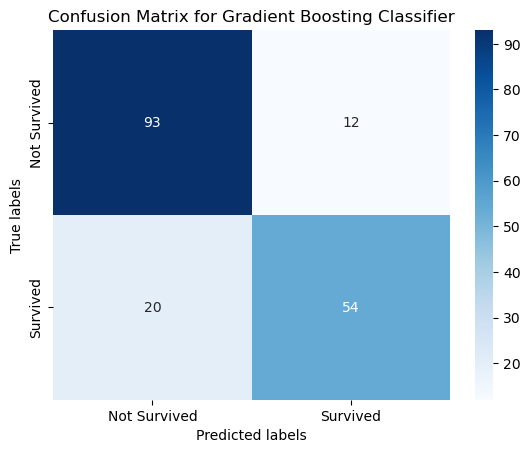

In [51]:
# Gradient Boosting Classifier
gb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(gb_cm)
plt.figure()
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix for Gradient Boosting Classifier")



Confusion Matrix for Random Forest Classifier:
[[93 12]
 [20 54]]


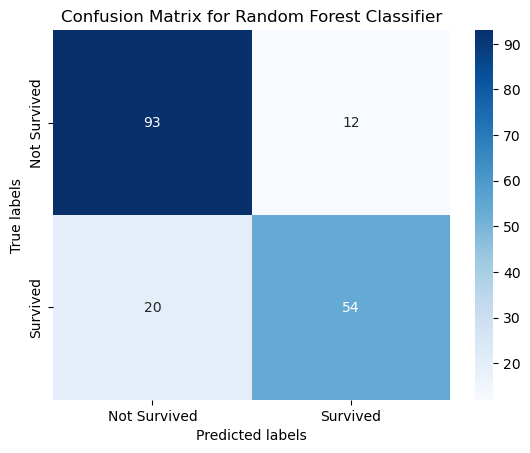

In [52]:
# Random Forest Classifier
rf_y_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("\nConfusion Matrix for Random Forest Classifier:")
print(rf_cm)
plt.figure()
plot_confusion_matrix(y_test, rf_y_pred, title="Confusion Matrix for Random Forest Classifier")


Confusion Matrix for Support Vector Machine Classifier:
[[101   4]
 [ 58  16]]


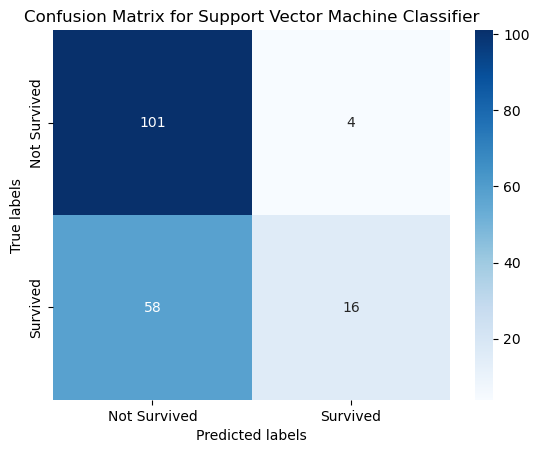

In [53]:
# Support Vector Machine Classifier
svm_y_pred = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("\nConfusion Matrix for Support Vector Machine Classifier:")
print(svm_cm)
plt.figure()
plot_confusion_matrix(y_test, svm_y_pred, title="Confusion Matrix for Support Vector Machine Classifier")


Confusion Matrix for Logistic Regression:
[[91 14]
 [21 53]]


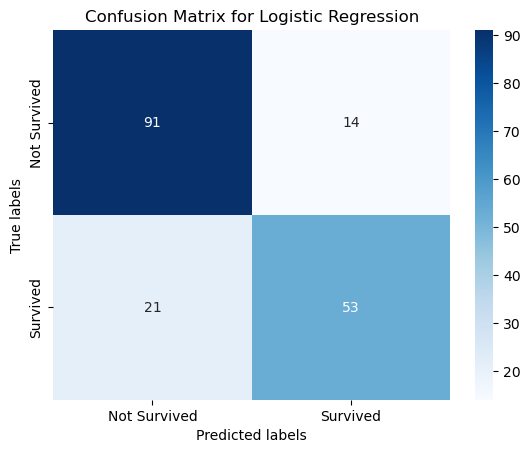

In [54]:
# Logistic Regression
log_reg_y_pred = log_reg_model.predict(X_test)
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)
print("\nConfusion Matrix for Logistic Regression:")
print(log_reg_cm)
plt.figure()
plot_confusion_matrix(y_test, log_reg_y_pred, title="Confusion Matrix for Logistic Regression")

# Testing the model

In [55]:
# Load the test dataset
test_df = pd.read_csv('F:\\Titanic\\test.csv')

In [56]:
print("First few rows of the test dataset:")
print(test_df.head())

First few rows of the test dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


### Preprocessing the test data similar to the training data

In [57]:
# Step 1: Impute missing ages with the mean age
mean_age = test_df['Age'].mean()
test_df['Age'].fillna(mean_age, inplace=True)

In [58]:
# Step 2: Drop the 'Cabin' column
test_df.drop('Cabin', axis=1, inplace=True)

In [59]:
# Step 3: Impute missing 'Fare' value with the mean fare
mean_fare = test_df['Fare'].mean()
test_df['Fare'].fillna(mean_fare, inplace=True)

In [60]:
# Step 4: Impute missing 'Embarked' values with the most common port
most_common_embarked = test_df['Embarked'].mode()[0]
test_df['Embarked'].fillna(most_common_embarked, inplace=True)

In [61]:
# Step 5: Family Size
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [62]:
# Step 6: Age Group
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 200], labels=['Child', 'Teenager', 'Adult', 'Elderly'])

In [63]:
# Step 6: Is Alone
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

In [64]:
# Step 7: Age Group
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 200], labels=['Child', 'Teenager', 'Adult', 'Elderly'])

In [65]:
# Step 8: Fare per Person
test_df['FarePerPerson'] = test_df['Fare'] / test_df['FamilySize']

In [66]:
# Convert categorical variables using one-hot encoding
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [67]:
# Select features
X_test_final = test_df[features]

In [68]:
from sklearn.impute import SimpleImputer

In [69]:
# Handle any remaining missing values
imputer = SimpleImputer(strategy='median')
X_test_final = pd.DataFrame(imputer.fit_transform(X_test_final), columns=X_test_final.columns)

In [70]:
# Load the trained model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [71]:
# Make predictions
predictions = gb_model.predict(X_test_final)

In [72]:
# Create a DataFrame with the PassengerId and the corresponding Survived predictions
result_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})

In [73]:
# Export the result to a CSV file
result_df.to_csv('F:\\Titanic\\predicted_results.csv', index=False)

In [74]:
# Display the first few rows of the result
print(result_df.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


### Perform k-fold cross-validation

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(gb_model, X, y, cv=5)

In [77]:
print('Cross-validation scores: ', cv_scores)
print('Mean Accuracy: ', cv_scores.mean())

Cross-validation scores:  [0.80446927 0.80898876 0.87078652 0.80337079 0.84831461]
Mean Accuracy:  0.827185989580064


# Exporting the model

In [236]:
import joblib

In [237]:
file_path = 'gradient_boosting_model.pkl'

In [238]:
joblib.dump(gb_model, file_path)

['gradient_boosting_model.pkl']